In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

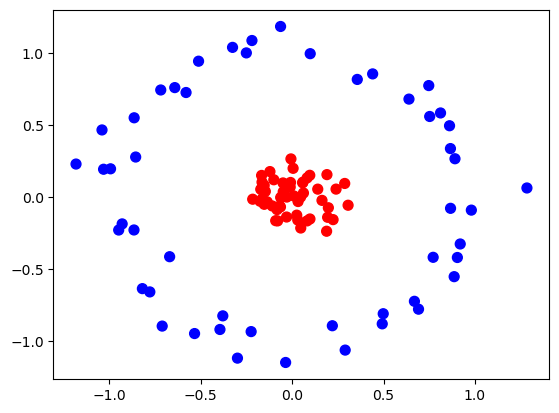

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9140\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


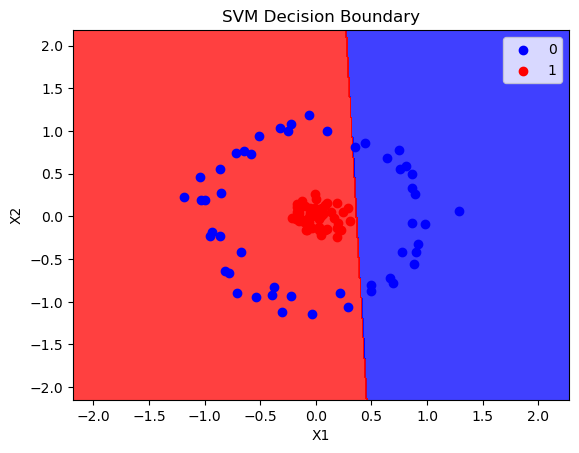

In [7]:
plot_decision_boundary(X, y, classifier)

In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

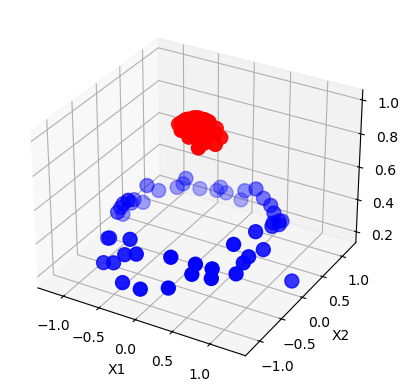

In [9]:
plot_3d_plot(X,y)

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_9140\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


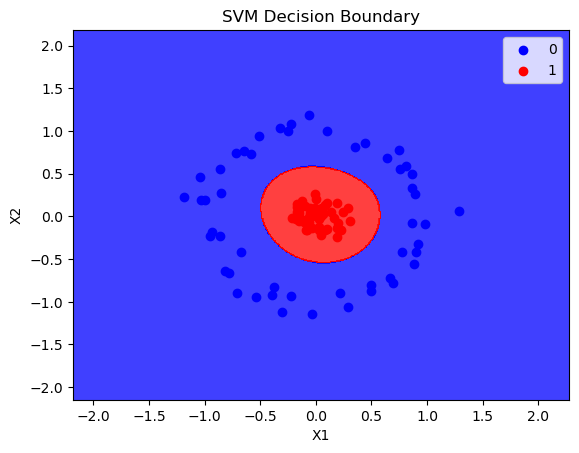

In [12]:
plot_decision_boundary(X, y, rbf_classifier)

In [13]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_9140\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


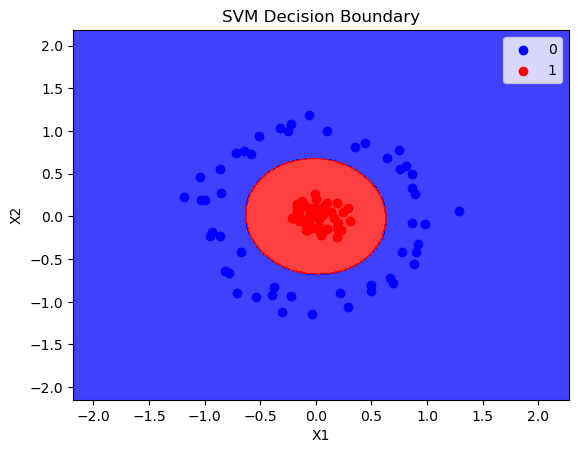

In [15]:
plot_decision_boundary(X, y, poly_classifier)

In [16]:
X

array([[ 0.28737124,  0.09588844],
       [ 0.28996182, -1.06117222],
       [-0.64265761,  0.76140756],
       [ 0.22368793, -0.15524249],
       [-0.77919581, -0.65714746],
       [-1.03230366,  0.19454916],
       [-0.08007838, -0.16415944],
       [-0.21623268, -0.01354036],
       [ 0.44029817,  0.85658468],
       [ 0.86660056, -0.07681028],
       [ 0.86106179,  0.49660341],
       [-0.32653474,  1.04077599],
       [-0.71942463,  0.74494234],
       [ 0.66883555, -0.72239176],
       [ 0.04674056, -0.21352351],
       [ 0.86602305,  0.33810651],
       [-0.05019675,  0.09952917],
       [ 0.77138184, -0.41689008],
       [ 0.69133582, -0.7770989 ],
       [-0.99425557,  0.19760346],
       [ 0.49272711, -0.87888328],
       [ 0.00489323,  0.20099212],
       [ 0.35613967,  0.81819207],
       [ 0.13985661,  0.0564067 ],
       [-1.18316768,  0.23064286],
       [-0.0642989 , -0.0672473 ],
       [-0.10934587, -0.06024728],
       [-0.00910818,  0.10276128],
       [ 0.09610983,

In [17]:
np.exp(-(X**2)).sum(1)

array([1.91158327, 1.2436596 , 1.22169959, 1.92738277, 1.1942152 ,
       1.30736152, 1.96701951, 1.95413635, 1.30388249, 1.46601361,
       1.2578749 , 1.23736833, 1.17007315, 1.23274765, 1.95324913,
       1.36434451, 1.9876263 , 1.39201326, 1.16674106, 1.33382343,
       1.24633069, 1.96038334, 1.3928747 , 1.97745352, 1.19481916,
       1.9913622 , 1.98449152, 1.98941272, 1.96780944, 1.99603064,
       1.36047115, 1.94081026, 1.99810109, 1.1200528 , 1.94006599,
       1.97528318, 1.97692786, 1.25849052, 1.98406572, 1.17861178,
       1.28126688, 1.97541877, 1.26694024, 1.29314768, 1.37329837,
       1.16000569, 1.99535287, 1.99492569, 1.40414327, 1.3002989 ,
       1.40493522, 1.96213344, 1.98584283, 1.37450431, 1.96777365,
       1.96815567, 1.24101731, 1.94394149, 1.3026932 , 1.96989805,
       1.1878542 , 1.97439196, 1.9314837 , 1.95394765, 1.99611674,
       1.36969245, 1.97331987, 1.97446039, 1.19368775, 1.35543744,
       1.99983053, 1.90763123, 1.99910247, 1.42218515, 1.94961

In [18]:
X_new=np.exp(-(X**2))

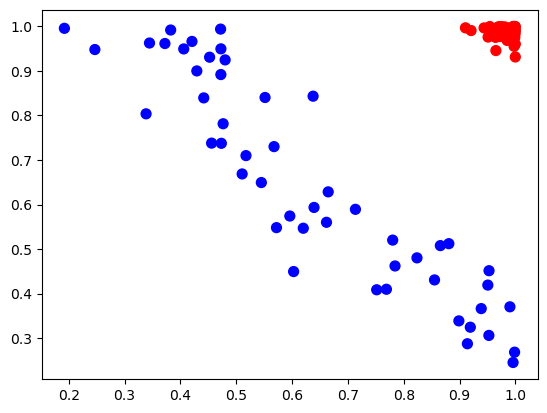

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')